[View in Colaboratory](https://colab.research.google.com/github/taisuke0812/department_classfier/blob/master/department_classfication.ipynb)

In [0]:
#ファイルのimport
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 

data = pd.read_csv("data.csv",header=0)

data

train_y = data["department"][:130]
train_X = data[:130]
test_X = data[130:]
test_y = data["department"][130:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = to_categorical(train_y) 

test_X = test_X.drop("number",axis=1)
test_X = test_X.drop("department",axis=1)
test_X = np.array(test_X)
test_y = np.array(test_y)
test_y = to_categorical(test_y) 

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

model = Sequential()

model.add(Dense(64,input_dim = 7,activation = "sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(6,activation = "softmax"))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_X,train_y,epochs=100,batch_size = 7)
scores = model.evaluate(test_X,test_y, verbose=0)
print(scores[1]*100)

Epoch 1/100
130/130 [==============================] - 0s 1ms/step - loss: 1.8184 - acc: 0.1385
Epoch 2/100
130/130 [==============================] - 0s 240us/step - loss: 1.7117 - acc: 0.1615
Epoch 3/100
130/130 [==============================] - 0s 235us/step - loss: 1.6749 - acc: 0.2077
Epoch 4/100
130/130 [==============================] - 0s 233us/step - loss: 1.6527 - acc: 0.1077
Epoch 5/100
130/130 [==============================] - 0s 239us/step - loss: 1.6426 - acc: 0.2154
Epoch 6/100
130/130 [==============================] - 0s 294us/step - loss: 1.6327 - acc: 0.1769
Epoch 7/100
130/130 [==============================] - 0s 228us/step - loss: 1.6295 - acc: 0.1923
Epoch 8/100
130/130 [==============================] - 0s 218us/step - loss: 1.6244 - acc: 0.2231
Epoch 9/100
130/130 [==============================] - 0s 256us/step - loss: 1.6145 - acc: 0.2154
Epoch 10/100
130/130 [==============================] - 0s 237us/step - loss: 1.6136 - acc: 0.2077
Epoch 11/100
130/130 

In [13]:
x = model.predict(test_X)
x
#なんか2番目に大きいものも抽出すればそれらしくなりそうな感じ？

array([[2.14130651e-08, 1.91352963e-01, 1.57244548e-01, 1.80973694e-01,
        7.07669184e-02, 3.99661928e-01],
       [1.12721059e-08, 2.10029140e-01, 2.01132417e-01, 2.64165491e-01,
        2.36165658e-01, 8.85072500e-02],
       [1.56366173e-08, 2.12105036e-01, 1.52991295e-01, 2.84931362e-01,
        1.92585990e-01, 1.57386243e-01],
       [9.03357833e-09, 2.30691358e-01, 2.75356442e-01, 1.43030003e-01,
        3.13456506e-01, 3.74657027e-02],
       [1.32695250e-08, 2.21727446e-01, 2.03936815e-01, 2.48545989e-01,
        2.27795333e-01, 9.79943350e-02],
       [1.04032969e-08, 2.27917016e-01, 2.77055234e-01, 1.81314349e-01,
        2.49951959e-01, 6.37614205e-02],
       [1.58282045e-08, 2.26683527e-01, 2.23714352e-01, 2.12542310e-01,
        1.81171447e-01, 1.55888379e-01],
       [1.15616041e-08, 2.15084597e-01, 1.79138571e-01, 2.62577653e-01,
        2.56119817e-01, 8.70793015e-02],
       [2.02556087e-08, 1.39684141e-01, 1.13296874e-01, 1.58866003e-01,
        4.33891043e-02, 

In [14]:
pred = np.array(np.argmax(x,axis=1))
pred

array([5, 3, 3, 4, 3, 2, 1, 3, 5, 1, 1, 4, 4, 4, 1, 2, 4, 4, 1, 4, 4, 5,
       5, 2, 4, 5, 4, 5])

In [15]:
t = np.argmax(test_y,axis=1)
np.array(t)

array([2, 3, 2, 3, 3, 4, 1, 2, 1, 5, 2, 4, 3, 4, 5, 2, 2, 1, 2, 4, 4, 5,
       5, 4, 4, 3, 4, 3])

ここからは適当にモデルを組みまくる


In [74]:
#ファイルのimport
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD



data = pd.read_csv("data.csv",header=0)

data

train_y = data["department"][:50]
train_X = data[:50]
test_X = data[50:]
test_y = data["department"][50:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = to_categorical(train_y) 

test_X = test_X.drop("number",axis=1)
test_X = test_X.drop("department",axis=1)
test_X = np.array(test_X)
test_y = np.array(test_y)
test_y = to_categorical(test_y) 

model = Sequential()

model.add(Dense(64,input_dim = 7,activation = "sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(6,activation = "softmax"))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_X,train_y,epochs=1000,batch_size = 10)

Epoch 1/1000
50/50 [==============================] - 0s 8ms/step - loss: 2.1126 - acc: 0.0000e+00
Epoch 2/1000
50/50 [==============================] - 0s 268us/step - loss: 1.9535 - acc: 0.1000
Epoch 3/1000
50/50 [==============================] - 0s 224us/step - loss: 1.8669 - acc: 0.2000
Epoch 4/1000
50/50 [==============================] - 0s 204us/step - loss: 1.8190 - acc: 0.2000
Epoch 5/1000
50/50 [==============================] - 0s 278us/step - loss: 1.7753 - acc: 0.2400
Epoch 6/1000
50/50 [==============================] - 0s 241us/step - loss: 1.7473 - acc: 0.2400
Epoch 7/1000
50/50 [==============================] - 0s 234us/step - loss: 1.7264 - acc: 0.2200
Epoch 8/1000
50/50 [==============================] - 0s 261us/step - loss: 1.7074 - acc: 0.2400
Epoch 9/1000
50/50 [==============================] - 0s 252us/step - loss: 1.6983 - acc: 0.2400
Epoch 10/1000
50/50 [==============================] - 0s 245us/step - loss: 1.6826 - acc: 0.1800
Epoch 11/1000
50/50 [======

In [75]:
x = model.predict(test_X)
pred = np.array(np.argmax(x,axis=1))
pred

array([3, 2, 5, 5, 2, 2, 2, 5, 1, 4])

In [71]:
t = np.argmax(test_y,axis=1)
t


array([5, 1, 2, 1, 4, 1, 4, 2, 2, 2])

K近傍法

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 




data = pd.read_csv("data.csv",header=0)

data

train_y = data["department"][:130]
train_X = data[:130]
test_X = data[130:]
test_y = data["department"][130:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = to_categorical(train_y) 

test_X = test_X.drop("number",axis=1)
test_X = test_X.drop("department",axis=1)
test_X = np.array(test_X)
test_y = np.array(test_y)
test_y = to_categorical(test_y) 


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_X, train_y) 
pred = neigh.predict(test_X)
print(pred)

predict = np.array(np.argmax(x,axis=1))
print(predict)

t = np.argmax(test_y,axis=1)

print(t)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[5 3 3 2 3 2 2 3 5 2 2 4 4 4 3 2 4 4 3 4 4 5 5 2 2 5 2 5]
[2 3 2 3 3 4 1 2 1 5 2 4 3 4 5 2 2 1 2 4 4 5 5 4 4 3 4 3]


K-means


In [10]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 
from sklearn.cluster import KMeans


data = pd.read_csv("data.csv",header=0)

data

train_y = data["department"][:130]
train_X = data[:130]
test_X = data[130:]
test_y = data["department"][130:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = to_categorical(train_y) 

test_X = test_X.drop("number",axis=1)
test_X = test_X.drop("department",axis=1)
test_X = np.array(test_X)
test_y = np.array(test_y)
test_y = to_categorical(test_y) 

kmeans = KMeans(n_clusters=6)
pred = kmeans.fit(train_X,train_y)
predict = kmeans.fit_predict(train_X,train_y)
print(predict)

test_data = kmeans.predict(test_X)
print(test_data)
print(np.argmax(test_y,axis=1))



[3 1 5 0 3 2 2 4 0 3 2 0 3 2 1 0 0 5 5 1 1 0 0 4 3 4 1 3 5 5 5 5 5 1 2 5 0
 2 2 4 0 4 0 5 5 3 3 3 3 4 5 0 2 2 3 3 1 3 0 1 5 5 0 5 4 2 4 1 4 4 5 0 2 2
 1 2 5 4 5 2 0 0 2 4 0 5 3 5 0 2 1 1 4 4 3 4 2 2 4 3 0 3 1 1 4 3 0 0 1 4 5
 1 1 4 0 5 0 0 1 3 3 3 4 1 1 0 3 3 1 4]
[3 5 3 5 3 5 0 5 0 0 5 1 1 1 0 2 4 1 4 1 1 0 5 3 3 0 3 0]
[2 3 2 3 3 4 1 2 1 5 2 4 3 4 5 2 2 1 2 4 4 5 5 4 4 3 4 3]


RandomForest

In [11]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("data.csv",header=0)

data

train_y = data["department"][:130]
train_X = data[:130]
test_X = data[130:]
test_y = data["department"][130:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = to_categorical(train_y) 

test_X = test_X.drop("number",axis=1)
test_X = test_X.drop("department",axis=1)
test_X = np.array(test_X)
test_y = np.array(test_y)
test_y = to_categorical(test_y) 

model = RandomForestClassifier(n_estimators = 10)

model.fit(train_X,train_y)

array = model.predict(test_X)

print(np.argmax(array,axis=1))
print(np.argmax(test_y,axis=1))

[0 0 0 1 4 2 0 3 1 2 1 4 4 4 0 0 4 4 1 4 0 0 3 3 0 1 0 1]
[2 3 2 3 3 4 1 2 1 5 2 4 3 4 5 2 2 1 2 4 4 5 5 4 4 3 4 3]


deep learningで頑張りたい

In [28]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import SGD
#ファイルのimport
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 

data = pd.read_csv("data.csv",header=0)

data

train_y = data["department"][:130]
train_X = data[:130]
test_X = data[130:]
test_y = data["department"][130:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = to_categorical(train_y) 

test_X = test_X.drop("number",axis=1)
test_X = test_X.drop("department",axis=1)
test_X = np.array(test_X)
test_y = np.array(test_y)
test_y = to_categorical(test_y) 
model = Sequential()

model.add(Dense(64,input_dim = 7,activation = "sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(6,activation = "softmax"))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_X,train_y,epochs=100,batch_size = 7)
scores = model.evaluate(test_X,test_y, verbose=0)
print(scores[1]*100)

Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 1.7409 - acc: 0.2154
Epoch 2/100
130/130 [==============================] - 0s 276us/step - loss: 1.6778 - acc: 0.2462
Epoch 3/100
130/130 [==============================] - 0s 251us/step - loss: 1.7073 - acc: 0.1692
Epoch 4/100
130/130 [==============================] - 0s 250us/step - loss: 1.6996 - acc: 0.1385
Epoch 5/100
130/130 [==============================] - 0s 241us/step - loss: 1.6958 - acc: 0.1846
Epoch 6/100
130/130 [==============================] - 0s 232us/step - loss: 1.7046 - acc: 0.1923
Epoch 7/100
130/130 [==============================] - 0s 247us/step - loss: 1.6320 - acc: 0.2538
Epoch 8/100
130/130 [==============================] - 0s 239us/step - loss: 1.6915 - acc: 0.2000
Epoch 9/100
130/130 [==============================] - 0s 263us/step - loss: 1.6364 - acc: 0.2231
Epoch 10/100
130/130 [==============================] - 0s 268us/step - loss: 1.6631 - acc: 0.2231
Epoch 11/100
130/130 

Chainerのインストール

In [1]:
!curl https://colab.chainer.org/install | sh -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1379  100  1379    0     0   5203      0 --:--:-- --:--:-- --:--:--  5203
+ apt -y -q install cuda-libraries-dev-9-2
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  cuda-cublas-dev-9-2 cuda-cufft-dev-9-2 cuda-curand-dev-9-2
  cuda-cusolver-dev-9-2 cuda-cusparse-dev-9-2 cuda-npp-dev-9-2
  cuda-nvgraph-dev-9-2 cuda-nvrtc-dev-9-2
The following NEW packages will be installed:
  cuda-cublas-dev-9-2 cuda-cufft-dev-9-2 cuda-curand-dev-9-2
  cuda-cusolver-dev-9-2 cuda-cusparse-dev-9-2 cuda-libraries-dev-9-2
  cuda-npp-dev-9-2 cuda-nvgraph-dev-9-2 cuda-nvrtc-dev-9-2
0 upgraded, 9 newly installed, 0 to remove and 12 not upgraded.
Need to get 332 MB of archives.
After this operation, 972 MB of additional disk space will be used.
Get:1 https://develo

ここからはChainerを使っていく

In [8]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import training
from chainer.training import extensions
from chainer import Link,Chain,ChainList
from chainer import cuda,Function,gradient_check,Variable,optimizers,serializers,utils
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("data.csv",header=0)

data

train_y = data["department"][:130]
train_X = data[:130]
test_X = data[130:]
test_y = data["department"][130:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = to_categorical(train_y) 
N = len(train_X)
#Y2 = np.zeros(6*N).reshape(N,6).astype(np.float32)
#for j in range(N):
  #Y2[i,train_y[i]] = 1.0

#del test_y

test_X = test_X.drop("number",axis=1)
test_X = test_X.drop("department",axis=1)
test_X = np.array(test_X)
test_y = np.array(test_y)
#test_y = to_categorical(test_y) 


dataset = chainer.datasets.TupleDataset(train_X.astype(np.float32),train_y.astype(np.float32))

train_X = train_X.astype(np.float32)
train_y = train_y.astype(np.float32)
test_X = test_X.astype(np.float32)
test_y = test_y.astype(np.float32)



class NitChain(Chain):
  def __init__(self):
    super(NitChain,self).__init__(
      l1 = L.Linear(7,20),
      l2 = L.Linear(20,12),
      l3 = L.Linear(12,6)
    )
    #@NitChain.forward_method
  def __call__(self,x,y):
      return F.mean_squared_error(self.fwd(x),y)
    
  def fwd(self,x):
      h1 = F.sigmoid(self.l1(x))
      h2 = F.sigmoid(self.l2(h1))
      h3 = self.l3(h2)
      h4 = F.softmax(h3)
      return h4
    

    
    
model = NitChain()
optimizer = optimizers.SGD()
optimizer.setup(model)

for i in range(10000):
  x = Variable(train_X)
  y = Variable(train_y)
  model.zerograds()
  loss = model(x,y)
  loss.backward()
  optimizer.update()
  
  
  
xt = Variable(test_X)
yt = model.fwd(xt)
ans = yt.data
nrow,ncol = ans.shape
ok = 0
for i in range(nrow):
  cls = np.argmax(ans[i,:])
  if cls == test_y[i]:
    ok += 1
    
print(ok*1.0/nrow)

0.2857142857142857


主成分分析をしていきたい

            department      no_1      no_2      no_3      no_4      no_5  \
department    1.000000  0.127342  0.061876 -0.056403 -0.039394  0.053542   
no_1          0.127342  1.000000  0.201382  0.156586 -0.047164  0.086214   
no_2          0.061876  0.201382  1.000000  0.168213 -0.039423  0.121870   
no_3         -0.056403  0.156586  0.168213  1.000000  0.273211  0.070040   
no_4         -0.039394 -0.047164 -0.039423  0.273211  1.000000  0.153759   
no_5          0.053542  0.086214  0.121870  0.070040  0.153759  1.000000   
no_6          0.057161  0.126880  0.008042  0.146729  0.108785  0.164520   
no_7          0.094969  0.228285  0.221856 -0.017480  0.003420  0.179738   

                no_6      no_7  
department  0.057161  0.094969  
no_1        0.126880  0.228285  
no_2        0.008042  0.221856  
no_3        0.146729 -0.017480  
no_4        0.108785  0.003420  
no_5        0.164520  0.179738  
no_6        1.000000 -0.007081  
no_7       -0.007081  1.000000  
          no_1    

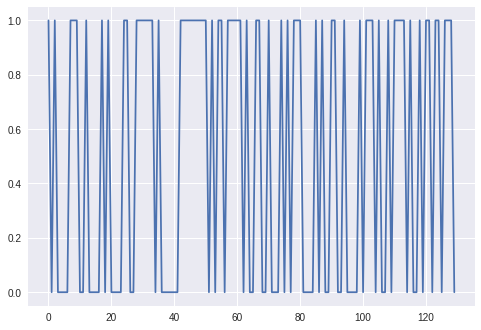

In [23]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import training
from chainer.training import extensions
from chainer import Link,Chain,ChainList
from chainer import cuda,Function,gradient_check,Variable,optimizers,serializers,utils
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv",header=0)
print(data.corr())
data

train_y = data["department"][:130]
train_X = data[:130]
test_X = data[130:]
test_y = data["department"][130:]

train_X = train_X.drop("number",axis=1)
train_X = train_X.drop("department",axis=1)
#相関係数を出す
print(train_X.corr())
train_X = np.array(train_X)
train_y = np.array(train_y)
#train_y = to_categorical(train_y) 

pca = PCA(n_components = 7)
pca.fit(train_X)
#主成分分析を行う
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

x = train_X[:,2]
y = train_y[:]

py = np.argmax(y)

print(py)
plt.plot(x)